In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv(r'D:/PYTHON/heart_disease.csv', sep=";")
print(df.head())

    age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  target  
0    3.0  0.0   6.0    0       1  
1    2.0  3.0   3.0    2       1  
2    2.0  2.0   7.0    1       1  
3    3.0  0.0   3.0    0       1  
4    1.0  0.0   3.0    0       1  


In [5]:
print(df.head())
print(df.shape)
print(df.columns)

    age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  target  
0    3.0  0.0   6.0    0       1  
1    2.0  3.0   3.0    2       1  
2    2.0  2.0   7.0    1       1  
3    3.0  0.0   3.0    0       1  
4    1.0  0.0   3.0    0       1  
(303, 15)
Index(['age', 'sex', 'cp', 'trestbps', 'cho', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'target'],
      dtype='object')


Text(0.5, 1.0, 'Male (1) vs Female (0) affected by Heart Diseases')

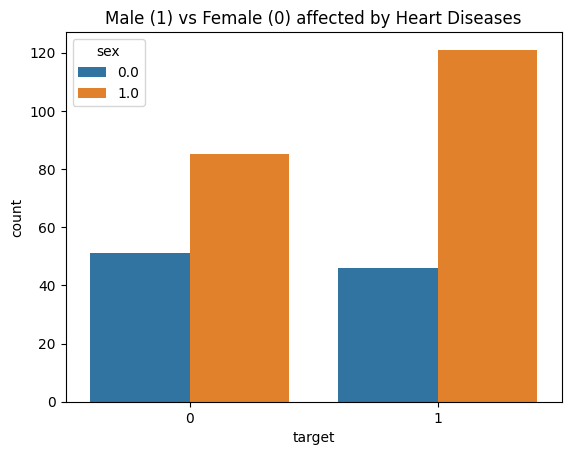

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'target',data = df,hue = 'sex')
plt.title("Male (1) vs Female (0) affected by Heart Diseases")

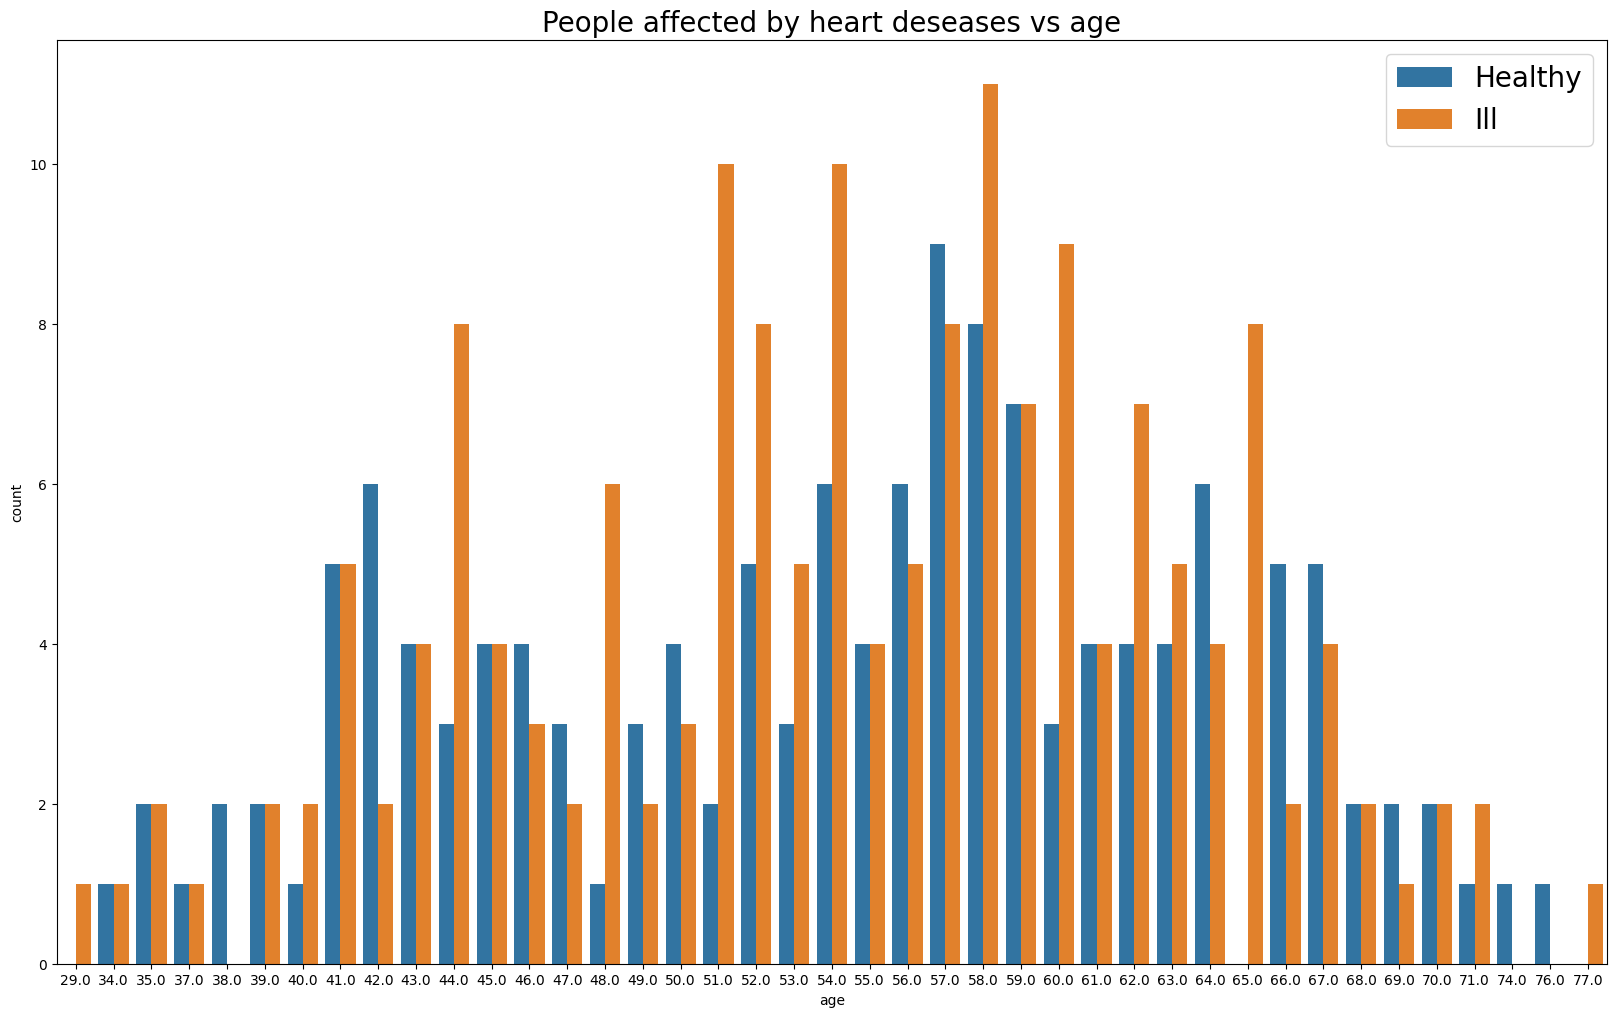

In [7]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'age',hue = 'target',data = df)
plt.title("People affected by heart deseases vs age", fontsize=20)
plt.legend(["Healthy","Ill"], fontsize=20)

Text(0.5, 1.0, 'Heart rate vs Age')

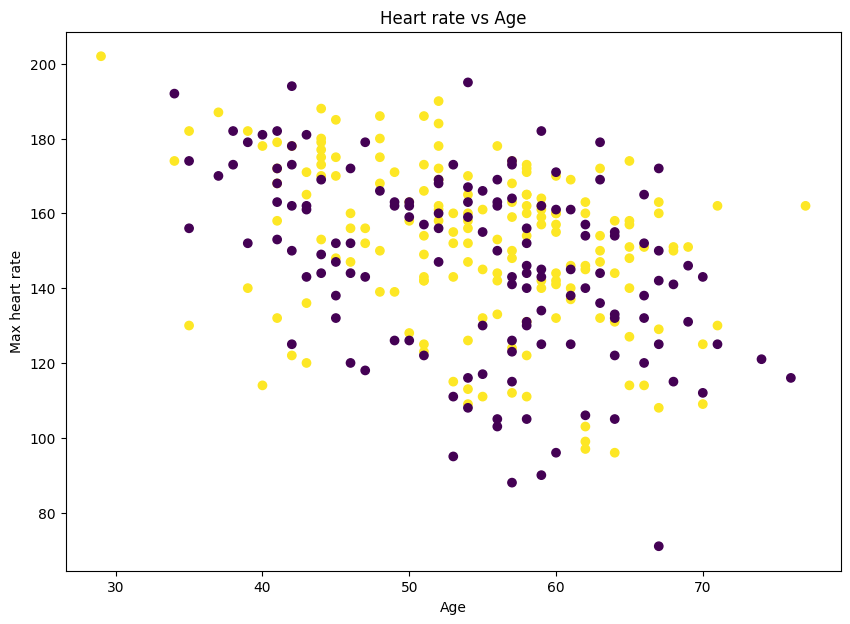

In [8]:
plt.figure(figsize = (10,7))
plt.scatter(x = 'age',y = 'thalach', c='target',data = df)
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.title('Heart rate vs Age')

<Axes: >

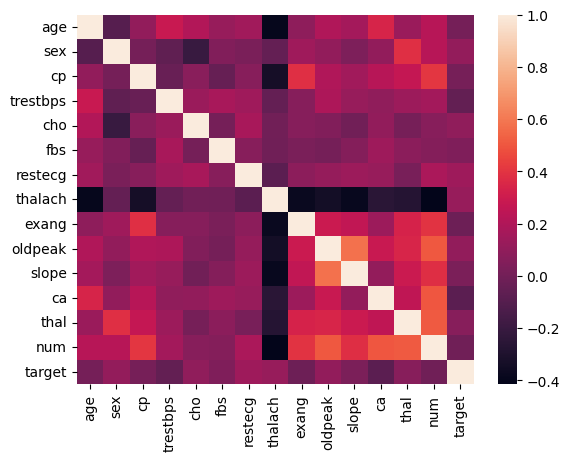

In [9]:
import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1).values
Y = df['target']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [11]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [12]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[21 22]
 [ 8 40]]
              precision    recall  f1-score   support

           0       0.72      0.49      0.58        43
           1       0.65      0.83      0.73        48

    accuracy                           0.67        91
   macro avg       0.68      0.66      0.66        91
weighted avg       0.68      0.67      0.66        91



In [13]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[15 28]
 [10 38]]
              precision    recall  f1-score   support

           0       0.60      0.35      0.44        43
           1       0.58      0.79      0.67        48

    accuracy                           0.58        91
   macro avg       0.59      0.57      0.55        91
weighted avg       0.59      0.58      0.56        91



In [14]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

[[20 23]
 [ 9 39]]
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.63      0.81      0.71        48

    accuracy                           0.65        91
   macro avg       0.66      0.64      0.63        91
weighted avg       0.66      0.65      0.64        91



In [15]:
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

[[21 22]
 [19 29]]
              precision    recall  f1-score   support

           0       0.53      0.49      0.51        43
           1       0.57      0.60      0.59        48

    accuracy                           0.55        91
   macro avg       0.55      0.55      0.55        91
weighted avg       0.55      0.55      0.55        91



In [16]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

[[20 23]
 [ 9 39]]
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.63      0.81      0.71        48

    accuracy                           0.65        91
   macro avg       0.66      0.64      0.63        91
weighted avg       0.66      0.65      0.64        91



In [17]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

[[20 23]
 [14 34]]
              precision    recall  f1-score   support

           0       0.59      0.47      0.52        43
           1       0.60      0.71      0.65        48

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.58        91
weighted avg       0.59      0.59      0.59        91



In [18]:
from itertools import product
import itertools
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


# Load sample data
data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

# Create an instance of XGBClassifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)




,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [19]:
def plot_confusion_matrix(cm, classes=["0", "1"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix ' +title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot = confusion_matrix(Y_Test,predictions)

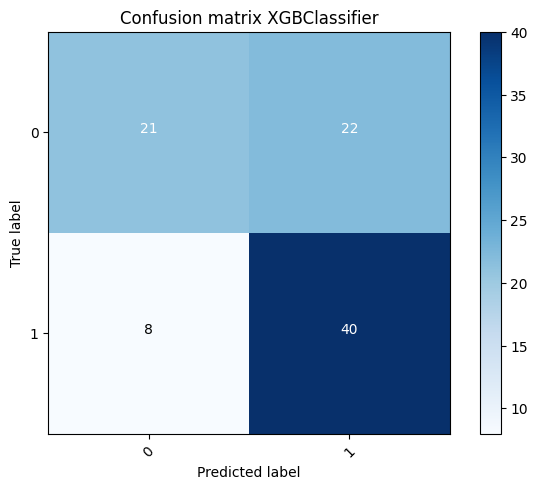

In [20]:
plt.figure()
plot_confusion_matrix(cm_plot, title = 'XGBClassifier')

Feature Engineering

Principal Component Analysis 

In [21]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)

# pca = PCA(n_components=2,svd_solver='full')
# X_reduced = pca.fit_transform(X_Train)
#X_reduced = TSNE(n_components=2).fit_transform(X_Train, Y_Train)

trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_reduced, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_reduced,Y_Train)
trainedmodel = LogisticRegression().fit(X_reduced,Y_Train)

In [22]:
# pca = PCA(n_components=2,svd_solver='full')
# X_test_reduced = pca.fit_transform(X_Test)
#X_test_reduced = TSNE(n_components=2).fit_transform(X_Test, Y_Test)

print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))


Naive Bayes
[[ 0 43]
 [ 0 48]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.53      1.00      0.69        48

    accuracy                           0.53        91
   macro avg       0.26      0.50      0.35        91
weighted avg       0.28      0.53      0.36        91

SVM
[[ 0 43]
 [ 0 48]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.53      1.00      0.69        48

    accuracy                           0.53        91
   macro avg       0.26      0.50      0.35        91
weighted avg       0.28      0.53      0.36        91



In [23]:
print('Random Forest')
predictionforest = trainedforest.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

print('Logistic Regression')
predictions =trainedmodel.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

Random Forest
[[23 20]
 [21 27]]
              precision    recall  f1-score   support

           0       0.52      0.53      0.53        43
           1       0.57      0.56      0.57        48

    accuracy                           0.55        91
   macro avg       0.55      0.55      0.55        91
weighted avg       0.55      0.55      0.55        91

Logistic Regression
[[ 0 43]
 [ 0 48]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.53      1.00      0.69        48

    accuracy                           0.53        91
   macro avg       0.26      0.50      0.35        91
weighted avg       0.28      0.53      0.36        91



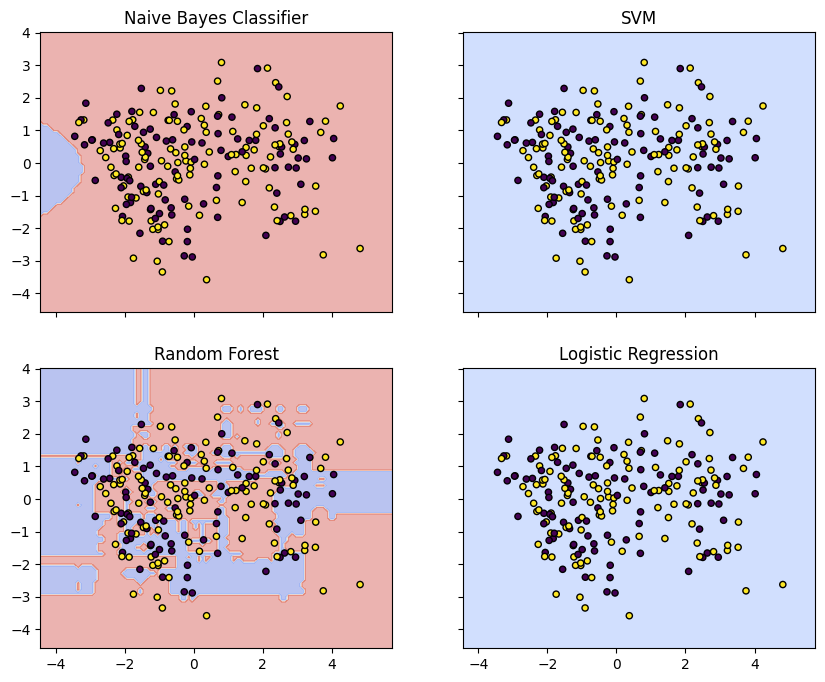

In [24]:
reduced_data = X_reduced

trainednb = GaussianNB().fit(reduced_data, Y_Train)
trainedsvm = svm.LinearSVC().fit(reduced_data, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(reduced_data,Y_Train)
trainedmodel = LogisticRegression().fit(reduced_data,Y_Train)



x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()


Linear Discriminant Analysis

In [25]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import numpy as np


# Assuming X and Y are your data
# ... (your data loading/preparation) ...

num_features = X.shape[1]
num_classes = len(np.unique(Y))

# Set n_components to the allowed maximum
n_components_allowed = min(num_features, num_classes - 1)

# If you still want 2 components, ensure it's within the limit
if 2 <= n_components_allowed:
    lda = LinearDiscriminantAnalysis(n_components=2)
else:
    # If 2 components are not possible, adjust or handle accordingly
    print(f"Cannot reduce to 2 components. Max allowed: {n_components_allowed}")
    lda = LinearDiscriminantAnalysis(n_components=n_components_allowed)
X_lda = lda.fit(X, Y).transform(X)


# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

## View the ratio of explained variance
print(lda.explained_variance_ratio_)
X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_lda, Y, test_size = 0.30, random_state = 101)

trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_reduced, Y_Train)

print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

Cannot reduce to 2 components. Max allowed: 1
Original number of features: 14
Reduced number of features: 1
[1.]
Naive Bayes
[[20 23]
 [ 5 43]]
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.65      0.90      0.75        48

    accuracy                           0.69        91
   macro avg       0.73      0.68      0.67        91
weighted avg       0.72      0.69      0.68        91

SVM
[[22 21]
 [ 5 43]]
              precision    recall  f1-score   support

           0       0.81      0.51      0.63        43
           1       0.67      0.90      0.77        48

    accuracy                           0.71        91
   macro avg       0.74      0.70      0.70        91
weighted avg       0.74      0.71      0.70        91



Clustering

In [26]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

# print('Original number of features:', X.shape[1])
# print('Reduced number of features:', X_lda.shape[1])
print(pca.explained_variance_ratio_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)

[0.26008582 0.11482581]


K-Means Clustering

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_reduced)

In [28]:
kpredictions = kmeans.predict(X_test_reduced)
print(confusion_matrix(Y_Test,kpredictions))
print(classification_report(Y_Test,kpredictions))

[[17 26]
 [14 34]]
              precision    recall  f1-score   support

           0       0.55      0.40      0.46        43
           1       0.57      0.71      0.63        48

    accuracy                           0.56        91
   macro avg       0.56      0.55      0.54        91
weighted avg       0.56      0.56      0.55        91



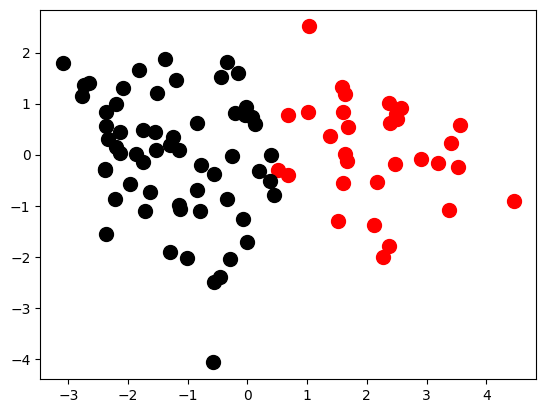

In [29]:
plt.scatter(X_test_reduced[kpredictions ==0,0], X_test_reduced[kpredictions == 0,1], s=100, c='red')
plt.scatter(X_test_reduced[kpredictions ==1,0], X_test_reduced[kpredictions == 1,1], s=100, c='black')

Hierarchical Clustering

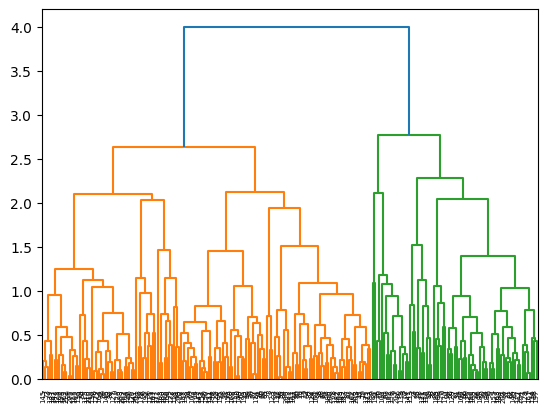

In [30]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method='average'))
# create clusters
hc = AgglomerativeClustering(n_clusters=2, linkage="average", metric="cosine")

# save clusters for chart
hierarchicalpredictions = hc.fit_predict(X_test_reduced)

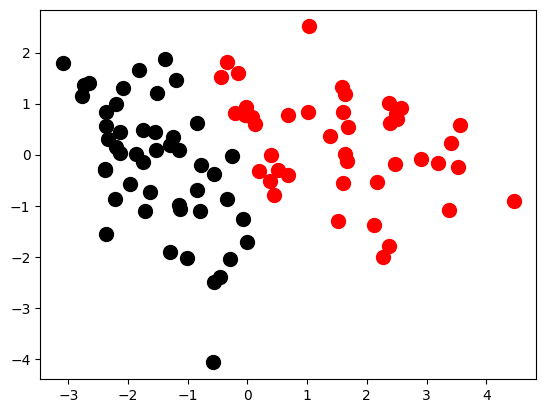

In [31]:
plt.scatter(X_test_reduced[hierarchicalpredictions ==0,0], X_test_reduced[hierarchicalpredictions == 0,1], s=100, c='red')
plt.scatter(X_test_reduced[hierarchicalpredictions ==1,0], X_test_reduced[hierarchicalpredictions == 1,1], s=100, c='black')